# Study colors in Paranal OBS

In [1]:
import sys
sys.path.append("../../")

import pandas as pd
from src.colors import color_paranal as color
from src import config

import matplotlib.pyplot as plt
import numpy as np


path="../../data/interim/PARANAL/"

## Collect colors by instance
For all OBS csv, the unique colors are extracted and merged in the single pandas ```colors_by_instance```.

In [2]:
FILES=!ls $path | grep OBS

In [3]:
acc=[]

for f in FILES:
    temp_dict={}
    instance=pd.read_csv(path+f)
    instance['color'] = instance['logtext'].apply(color)
    for i, r in instance.iterrows():
        if r['color'] not in temp_dict.keys():
            temp_dict[r['color']] = 1
        else:
            temp_dict[r['color']] += 1
    for k in temp_dict.keys():
        acc.append( {'file': f, 'color': k, 'count': temp_dict[k]} )

colors_by_instance = pd.DataFrame(acc)

## Colors statistics

In [4]:
colors_by_instance.sort_values('count', ascending=False)

,file,color,count
1626,GRAVITY-2018-12-16T02:46:41.104Z.OBS.csv,{} springgreen4,167
1834,GRAVITY-2018-12-16T02:46:41.104Z.OBS.csv,time {} {},161
44734,GRAVITY-2018-12-25T03:37:00.482Z.OBS.csv,time {} {},161
44548,GRAVITY-2018-12-25T03:37:00.482Z.OBS.csv,{} springgreen4,142
45685,GRAVITY-2018-12-25T04:58:44.937Z.OBS.csv,time {} {},138
...,...,...,...
22806,GRAVITY-2018-12-22T06:38:30.422Z.OBS.csv,seq z trackfi t,1
22807,GRAVITY-2018-12-22T06:38:30.422Z.OBS.csv,seq z takesky t,1
22808,GRAVITY-2018-12-22T06:38:30.422Z.OBS.csv,seq z preset t,1
22809,GRAVITY-2018-12-22T06:38:30.422Z.OBS.csv,seq z trackrot t,1


In [5]:
# of instances:
len(FILES)

142

In [6]:
# of colors
len(colors_by_instance["color"].unique())

1058

In [7]:
# Normalize by # of instaces
colors_by_instance['count-norm'] = colors_by_instance['count'] / len(FILES)

In [8]:
# Normalized totals by color (AVERAGE!)
norm_total = colors_by_instance[["color", "count-norm"]].groupby(["color"]).sum().sort_values('count-norm', ascending=False)
norm_total

,count-norm
color,
{} springgreen4,55.176056
time {} {},47.915493
send command setfiw {} {} {} {} process gvacqcontrol wgv,15.253521
ok springgreen4,14.788732
send command convrel {} sky acqcam {} {} {} {} process gvctucontrol wgv,12.669014
...,...
no_comment ft robj name hd104237 ft mode {} ins sobj y {} ins sobj name {} ft robj delta {} {} dpr type sky single ins sobj vis {} {} ft robj pma {} {},0.007042
ft robj alpha {} {} ins sobj mag {} {} fi hmag {} {} dpr catg science ft robj pmd {} {} tpl start {} ins sky x {} {} ft robj vis {} {} ft robj diameter {},0.007042
no_comment ft robj name hd105514 ft mode {} ins sobj y {} ins sobj name {} ft robj delta {} {} dpr type sky single ins sobj vis {} {} ft robj pma {} {},0.007042


In [13]:
norm_total.sort_values("color")

,count-norm
color,
,0.816901
_date_ blue,0.042254
abort,0.007042
abort exposure blue,0.838028
abort pending skipping end all,0.014085
...,...
{} {} {} flag {},0.112676
{} {} {} {},0.084507
{} {} {} {} flag {},1.302817


In [10]:
# Filtering total above THRESHOLD_MIN_AVG_COUNT
THRESHOLD_MIN_AVG_COUNT = 0.1
norm_total[ norm_total['count-norm'] >= THRESHOLD_MIN_AVG_COUNT ]

,count-norm
color,
{} springgreen4,55.176056
time {} {},47.915493
send command setfiw {} {} {} {} process gvacqcontrol wgv,15.253521
ok springgreen4,14.788732
send command convrel {} sky acqcam {} {} {} {} process gvctucontrol wgv,12.669014
...,...
{} obs watervapour {} {} obs start {} {} {}t04 {} {} obs ntpl {} obs tplno {} dpr catg science tpl did eso vlt dic tpl {} {} tpl id gravity_single_obs_exp,0.105634
obs twilight {} obs watervapour {} {} obs start {} {} {}t01 {} {} obs ntpl {} obs tplno {} dpr catg calib tpl did eso vlt dic tpl {} {} tpl id,0.105634
sci_sori obs observer {} obs pi coi id {} obs pi coi name unknown obs prog id {} d {} a obs strehlratio {} {} obs targ name {} obs twilight {},0.105634


In [11]:
#colors_by_instance[["color", "count"]].groupby(["color"]).median().sort_values('count', ascending=False)[:50]

## Plots

/Users/jgil/logdelay/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  


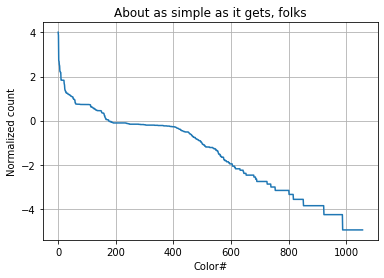

In [12]:
fig, ax = plt.subplots()
ax.plot( np.log(norm_total).get_values())

ax.set(xlabel='Color#', ylabel='Normalized count',
       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()
